In [8]:
## import library

import pandas as pd
import numpy as np
import datetime as dt

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

# 머신러닝 알고리즘
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 경고창 무시
import warnings
warnings.filterwarnings('ignore')

# matplotlib 한글 깨짐 해결
plt.rcParams['font.family'] = 'AppleGothic' # For MacOS
plt.rcParams['axes.unicode_minus'] =False

# Seaborn 폰트 설정
sns.set(font='AppleGothic') # 사용하고 있는 한글 폰트로 변경

print(plt.rcParams['font.family'])

['AppleGothic']


In [9]:
customers = pd.read_csv('customers.csv')
customers.head(10)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
5,000064249685c11552da43ef22a5030f35a147f723d5b0...,NaN,NaN,NaN,NaN,NaN,2c29ae653a9282cce4151bd87643c907644e09541abc28...
6,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,NaN,NaN,ACTIVE,NONE,20.0,fe7b8e2b3fafb89ca90db17ffeeae0fd29b795d803f749...
7,00007d2de826758b65a93dd24ce629ed66842531df6699...,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
8,00007e8d4e54114b5b2a9b51586325a8d0fa74ea23ef77...,NaN,NaN,ACTIVE,NONE,20.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
9,00008469a21b50b3d147c97135e25b4201a8c58997f787...,NaN,NaN,ACTIVE,NONE,20.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...


In [10]:
# fashion_news_frequency 컬럼의 'None'과 NaN 값을 'NONE'으로 처리
customers['fashion_news_frequency'].fillna('NONE', inplace=True)
customers['fashion_news_frequency'] = customers['fashion_news_frequency'].replace('None', 'NONE')

# transactions_train.csv 파일 불러오기
transactions = pd.read_csv('transactions_train.csv')

# 두 데이터프레임 병합
df = pd.merge(customers, transactions, on='customer_id', how='inner')

# 병합된 데이터프레임 확인
df.head(10)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,t_dat,article_id,price,sales_channel_id
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2018-12-27,625548001,0.044051,1
1,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2018-12-27,176209023,0.035576,1
2,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2018-12-27,627759010,0.030492,1
3,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2019-05-02,697138006,0.010153,2
4,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2019-05-25,568601006,0.050831,2
5,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2019-05-25,568601006,0.050831,2
6,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2019-07-25,607642008,0.012695,1
7,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2019-07-25,745232001,0.021169,1
8,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2019-09-18,656719005,0.044051,2
9,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2019-09-28,797065001,0.054220,2


## 2030 고객층 타겟팅을 위한 필터링

In [ ]:
# 연령대가 20대와 30대인 고객 필터링
filtered_customers_df = customers[(customers['age_group'] == '20대') | (customers['age_group'] == '30대')]

# 필요한 컬럼 선택
selected_columns = ['customer_id', 'FN', 'Active', 'club_member_status', 'fashion_news_frequency', 'age']

# 선택된 컬럼을 가진 새로운 데이터프레임 생성
customers_2030_df = filtered_customers_df[selected_columns]

# 결과를 CSV 파일로 저장
customers_2030_df.to_csv('customers_2030.csv', index=False)

In [11]:
## 데이터 불러오기

# customers_2030.csv 파일 불러오기
customers2030 = pd.read_csv('customers_2030.csv')

# transactions_train.csv 파일 불러오기
transactions = pd.read_csv('transactions_train.csv')

# fashion_news_frequency 컬럼의 'None'과 NaN 값을 'NONE'으로 처리
customers2030['fashion_news_frequency'].fillna('NONE', inplace=True)
customers2030['fashion_news_frequency'] = customers2030['fashion_news_frequency'].replace('None', 'NONE')

# 두 데이터프레임 병합
df2030 = pd.merge(customers2030, transactions, on='customer_id', how='inner')

# t_dat 컬럼을 datetime 형식으로 변환
df2030['t_dat'] = pd.to_datetime(df2030['t_dat'])

# 병합된 데이터프레임 확인
df2030.head(10)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,t_dat,article_id,price,sales_channel_id
0,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2018-09-21,583558001,0.067780,2
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2018-09-21,639677008,0.025407,2
2,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2018-09-21,640244003,0.033881,2
3,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2018-09-25,521269001,0.033881,2
4,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2018-09-25,666448006,0.025407,2
5,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2018-09-27,583558001,0.067780,2
6,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2018-09-27,673677002,0.016932,2
7,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2018-09-29,666448006,0.020322,1
8,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2019-01-10,690229003,0.033881,2
9,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2019-04-09,723469005,0.025407,2


In [12]:
df2030.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19563640 entries, 0 to 19563639
Data columns (total 10 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   customer_id             object        
 1   FN                      float64       
 2   Active                  float64       
 3   club_member_status      object        
 4   fashion_news_frequency  object        
 5   age                     float64       
 6   t_dat                   datetime64[ns]
 7   article_id              int64         
 8   price                   float64       
 9   sales_channel_id        int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 1.6+ GB


# RFM Analysis

## 1. Recency

In [13]:
## 데이터 셋 상 가장 최근 구매 날짜
df2030['t_dat'].max()

Timestamp('2020-09-22 00:00:00')

In [14]:
## 1. Recency

from datetime import datetime

# RFM 분석에 필요한 데이터프레임 생성
# 고객별로 가장 최근에 구매한 날짜
recency_df = df2030.groupby('customer_id')['t_dat'].max().reset_index()

# 전체 구매이력 중 가장 최근 구매 날짜
max_date = df2030['t_dat'].max()

# 고객별로 마지막 구매로부터 며칠이 지났는지
recency_df['diff_date'] = (max_date - recency_df['t_dat']).dt.days

# diff_date를 5등분해서 가장 낮은 구간에 5점, 가장 높은 구간에 1점의 점수를 부여
r_labels = range(5, 0, -1) # 5, 4, 3, 2, 1
r_quartiles = pd.qcut(recency_df['t_dat'], q=5, labels=r_labels)

# r점수 컬럼 생성
recency_df['r_score'] = r_quartiles

recency_df

,customer_id,t_dat,diff_date,r_score
0,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,2020-07-08,76,2
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,2020-09-15,7,1
2,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,2020-09-14,8,1
3,00007d2de826758b65a93dd24ce629ed66842531df6699...,2020-05-13,132,3
4,00007e8d4e54114b5b2a9b51586325a8d0fa74ea23ef77...,2020-01-05,261,4
...,...,...,...,...
779800,ffffa28cd7ab5d1cbbbfe7b582b1c419270cc0539f3dae...,2018-10-10,713,5
779801,ffffaff3905b803d1c7e153a1378a5151e1f34f236ba54...,2018-10-26,697,5
779802,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,2020-09-06,16,1
779803,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,2020-08-18,35,2


## 2. Frequency

In [15]:
## 2. Frequency

# RFM 분석에 필요한 데이터프레임 생성
# 고객별로 고유한 구매날짜 수를 집계하여 frequency_df를 생성해서 t_dat 컬럼삽입
frequency_df = df2030.groupby('customer_id')['t_dat'].nunique().reset_index()
frequency_df.rename(columns={'t_dat':'frequency'}, inplace=True) # 컬럼명 'frequency'로 변경

def parse_labels(x):
    switch = {
        1: 1, # 1회 구매시 1점
        2: 2, # 2회 구매시 2점
        3: 3, # 3회 구매시 3점
        4: 4 # 4회 구매시 4점
    }
    return switch.get(x, 5) # 5회 이상 구매시 5점 부여

# f점수 컬럼 생성
frequency_df['f_score'] = frequency_df['frequency'].apply(parse_labels)

frequency_df

,customer_id,frequency,f_score
0,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,23,5
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,7,5
2,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,3,3
3,00007d2de826758b65a93dd24ce629ed66842531df6699...,16,5
4,00007e8d4e54114b5b2a9b51586325a8d0fa74ea23ef77...,1,1
...,...,...,...
779800,ffffa28cd7ab5d1cbbbfe7b582b1c419270cc0539f3dae...,1,1
779801,ffffaff3905b803d1c7e153a1378a5151e1f34f236ba54...,1,1
779802,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,11,5
779803,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,19,5


In [16]:
customer_id = '0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa'
df[df['customer_id'] == customer_id]['t_dat']

21     2018-09-21
22     2018-09-21
23     2018-09-21
24     2018-09-25
25     2018-09-25
          ...    
102    2020-04-22
103    2020-04-22
104    2020-04-22
105    2020-04-22
106    2020-07-08
Name: t_dat, Length: 86, dtype: object

위 결과에 따르면 하나의 customer_id에 같은 t_dat이 기록되는 것을 알 수 있다.

즉, 한 번 구매할 때 하나의 구매 이력이 기록되는 것이 아니라, 구매한 개수 또는 제품에 따라 구매 이력이 기록되는 것으로 해석할 수 있다.

## 3. Monetary

In [17]:
## 3. Monetary

# RFM 분석에 필요한 데이터프레임 생성
# 고객별로 총 구매액 집계
# 실제 구매액(price * 590)으로 집계
monetary_df = df2030.groupby('customer_id')['price'].sum() * 590
monetary_df = monetary_df.reset_index()

# 5등분해서 가장 낮은 구간에 5점, 가장 높은 구간에 1점의 점수를 부여
m_labels = range(1, 6) # 1, 2, 3, 4, 5
m_quartiles = pd.qcut(monetary_df['price'], q=5, labels=m_labels)

# m점수 컬럼 생성
monetary_df['m_score'] = m_quartiles

monetary_df

,customer_id,price,m_score
0,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,1535.14,5
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,415.82,4
2,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,97.94,2
3,00007d2de826758b65a93dd24ce629ed66842531df6699...,2255.93,5
4,00007e8d4e54114b5b2a9b51586325a8d0fa74ea23ef77...,31.48,1
...,...,...,...
779800,ffffa28cd7ab5d1cbbbfe7b582b1c419270cc0539f3dae...,51.98,2
779801,ffffaff3905b803d1c7e153a1378a5151e1f34f236ba54...,71.99,2
779802,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,762.49,5
779803,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,1066.32,5


## 4. RFM 점수 부여하기

In [18]:
## 고객별로 RFM 점수 부여하기

# recency_df, frequency_df, monetary_df 병합하기
rfm_score = recency_df.merge(frequency_df, on = 'customer_id') # 먼저 recency_df에 frequency_df를 customer_id 기준으로 병합
rfm_score = rfm_score.merge(monetary_df, on = 'customer_id') # rfm_score에 monetary_df를 customer_id 기준으로 병합

# rfm_score을 합치기 위해 string으로 형 변환
rfm_score['r_score'] = rfm_score['r_score'].astype(str)
rfm_score['f_score'] = rfm_score['f_score'].astype(str)
rfm_score['m_score'] = rfm_score['m_score'].astype(str)

# rfm_class =  r_score, f_score, m_score을 object 형태로 이어붙인 것
rfm_score['rfm_class'] = rfm_score['r_score'] + rfm_score['f_score'] + rfm_score['m_score']

# rfm_total_score = r_score, f_score, m_score을 모두 합한 점수
rfm_score['rfm_total_score'] = rfm_score['r_score'] + rfm_score['f_score'] + rfm_score['m_score']

rfm_score

,customer_id,t_dat,diff_date,r_score,frequency,f_score,price,m_score,rfm_class,rfm_total_score
0,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,2020-07-08,76,2,23,5,1535.14,5,255,255
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,2020-09-15,7,1,7,5,415.82,4,154,154
2,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,2020-09-14,8,1,3,3,97.94,2,132,132
3,00007d2de826758b65a93dd24ce629ed66842531df6699...,2020-05-13,132,3,16,5,2255.93,5,355,355
4,00007e8d4e54114b5b2a9b51586325a8d0fa74ea23ef77...,2020-01-05,261,4,1,1,31.48,1,411,411
...,...,...,...,...,...,...,...,...,...,...
779800,ffffa28cd7ab5d1cbbbfe7b582b1c419270cc0539f3dae...,2018-10-10,713,5,1,1,51.98,2,512,512
779801,ffffaff3905b803d1c7e153a1378a5151e1f34f236ba54...,2018-10-26,697,5,1,1,71.99,2,512,512
779802,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,2020-09-06,16,1,11,5,762.49,5,155,155
779803,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,2020-08-18,35,2,19,5,1066.32,5,255,255


## 5. RFM 점수 기반 고객 세그먼트 세분화

R, F, M 은 각각 1~5점으로 나뉘어져 있다. 3점을 기준으로 3점 이상은 '높음', 3점 미만은 '낮음'으로 분류하고 이에 따라 총 8개로 고객 세그먼트를 분류했다.

In [19]:
# rfm_class의 각 숫자가 3이상이면 높음, 3미만이면 낮음을 의미하도록 지정
rfm_score['r_class'] = rfm_score['rfm_class'].apply(lambda x: int(str(x)[0]))
rfm_score['f_class'] = rfm_score['rfm_class'].apply(lambda x: int(str(x)[1]))
rfm_score['m_class'] = rfm_score['rfm_class'].apply(lambda x: int(str(x)[2]))

# 조건에 따라 segment를 생성
def segment_customer(row):
    r = row['r_class']
    f = row['f_class']
    m = row['m_class']
    
    if r >= 3 and f >= 3 and m >= 3:
        return '핵심 가치 고객'
    elif r < 3 and f >= 3 and m >= 3:
        return '핵심 충성 고객'
    elif r >= 3 and f < 3 and m >= 3:
        return '핵심 잠재 고객'
    elif r >= 3 and f >= 3 and m < 3:
        return '핵심 위험 고객'
    elif r >= 3 and f < 3 and m < 3:
        return '일반 가치 고객'
    elif r < 3 and f >= 3 and m < 3:
        return '일반 충성 고객'
    elif r < 3 and f < 3 and m >= 3:
        return '일반 잠재 고객'
    elif r < 3 and f < 3 and m < 3:
        return '일반 위험 고객'

rfm_score['segment'] = rfm_score.apply(segment_customer, axis=1)

rfm_score

,customer_id,t_dat,diff_date,r_score,frequency,f_score,price,m_score,rfm_class,rfm_total_score,r_class,f_class,m_class,segment
0,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,2020-07-08,76,2,23,5,1535.14,5,255,255,2,5,5,핵심 충성 고객
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,2020-09-15,7,1,7,5,415.82,4,154,154,1,5,4,핵심 충성 고객
2,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,2020-09-14,8,1,3,3,97.94,2,132,132,1,3,2,일반 충성 고객
3,00007d2de826758b65a93dd24ce629ed66842531df6699...,2020-05-13,132,3,16,5,2255.93,5,355,355,3,5,5,핵심 가치 고객
4,00007e8d4e54114b5b2a9b51586325a8d0fa74ea23ef77...,2020-01-05,261,4,1,1,31.48,1,411,411,4,1,1,일반 가치 고객
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779800,ffffa28cd7ab5d1cbbbfe7b582b1c419270cc0539f3dae...,2018-10-10,713,5,1,1,51.98,2,512,512,5,1,2,일반 가치 고객
779801,ffffaff3905b803d1c7e153a1378a5151e1f34f236ba54...,2018-10-26,697,5,1,1,71.99,2,512,512,5,1,2,일반 가치 고객
779802,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,2020-09-06,16,1,11,5,762.49,5,155,155,1,5,5,핵심 충성 고객
779803,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,2020-08-18,35,2,19,5,1066.32,5,255,255,2,5,5,핵심 충성 고객


In [20]:
## 고객 세그멘테이션에 따른 분포 파악
seg_cnt = rfm_score['segment'].value_counts()
seg_cnt = seg_cnt.to_frame() # 시리즈 -> 데이터프레임
seg_cnt = seg_cnt.reset_index() # 설정된 인덱스를 제거하고 기본 인덱스(0, 1, 2,..n)으로 변경
seg_cnt.rename(columns = {'index':'segment', 'segment':'count'}, inplace=True) # 컬럼명 변경
seg_cnt['percent'] = round((seg_cnt['count']/seg_cnt['count'].sum()) * 100, 1) # 각 고객 세그먼트별 퍼센티지(반올림)

## rfm_score 데이터프레임에 seg_cnt 합치기
rfm_score_merged = pd.merge(rfm_score, seg_cnt, on='segment', how='left') # segment 컬럼을 기준으로 두 데이터프레임을 병합

# 결과 확인
rfm_score_merged

,customer_id,t_dat,diff_date,r_score,frequency,f_score,price,m_score,rfm_class,rfm_total_score,r_class,f_class,m_class,segment,count,percent
0,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,2020-07-08,76,2,23,5,1535.14,5,255,255,2,5,5,핵심 충성 고객,244613,31.4
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,2020-09-15,7,1,7,5,415.82,4,154,154,1,5,4,핵심 충성 고객,244613,31.4
2,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,2020-09-14,8,1,3,3,97.94,2,132,132,1,3,2,일반 충성 고객,13660,1.8
3,00007d2de826758b65a93dd24ce629ed66842531df6699...,2020-05-13,132,3,16,5,2255.93,5,355,355,3,5,5,핵심 가치 고객,156089,20.0
4,00007e8d4e54114b5b2a9b51586325a8d0fa74ea23ef77...,2020-01-05,261,4,1,1,31.48,1,411,411,4,1,1,일반 가치 고객,230717,29.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779800,ffffa28cd7ab5d1cbbbfe7b582b1c419270cc0539f3dae...,2018-10-10,713,5,1,1,51.98,2,512,512,5,1,2,일반 가치 고객,230717,29.6
779801,ffffaff3905b803d1c7e153a1378a5151e1f34f236ba54...,2018-10-26,697,5,1,1,71.99,2,512,512,5,1,2,일반 가치 고객,230717,29.6
779802,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,2020-09-06,16,1,11,5,762.49,5,155,155,1,5,5,핵심 충성 고객,244613,31.4
779803,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,2020-08-18,35,2,19,5,1066.32,5,255,255,2,5,5,핵심 충성 고객,244613,31.4


## 6. 고객 세그멘테이션에 따르 분포를 트리맵으로 시각화

['AppleGothic']


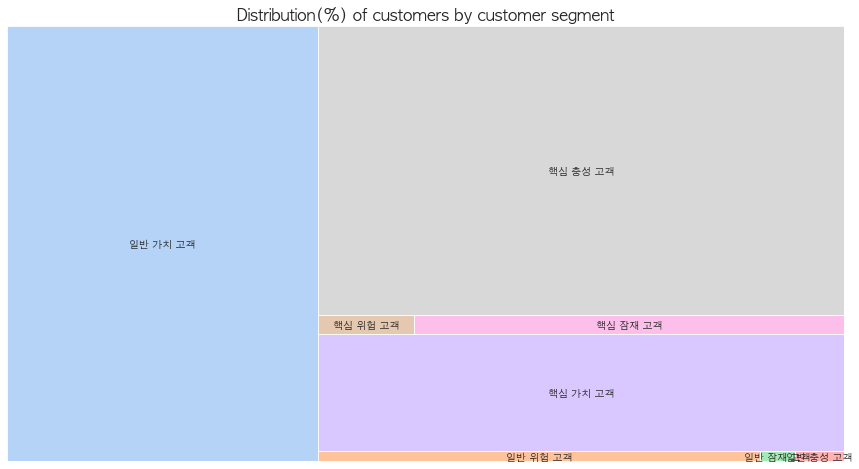

In [21]:
import matplotlib.pyplot as plt
import squarify
import seaborn as sns

# matplotlib 한글 깨짐 해결
plt.rcParams['font.family'] = 'AppleGothic' # For MacOS
print(plt.rcParams['font.family'])

# 파스텔 톤 색상 팔레트
pastel_colors = sns.color_palette("pastel")

# segment 컬럼을 기준으로 각 segment가 차지하는 비율 계산
segment_percent = rfm_score_merged.groupby('segment')['percent'].sum()

# 트리맵 그리기
plt.figure(figsize=(15, 8))
squarify.plot(sizes=segment_percent, label=segment_percent.index, 
              alpha=0.8, color=pastel_colors, text_kwargs={'fontsize':10, 'fontweight':'bold'})
plt.title('Distribution(%) of customers by customer segment', fontsize=16)
plt.axis('off')  # x, y 축 제거
plt.show()

In [22]:
## 데이터 타입 변환
rfm_score_merged['r_score'] = rfm_score_merged['r_score'].astype('int64')
rfm_score_merged['f_score'] = rfm_score_merged['f_score'].astype('int64')
rfm_score_merged['m_score'] = rfm_score_merged['m_score'].astype('int64')
rfm_score_merged['rfm_total_score'] = rfm_score_merged['rfm_total_score'].astype('int64')

# COVID-19 전후 고객 행동 특성 변화 파악

<Figure size 864x576 with 0 Axes>

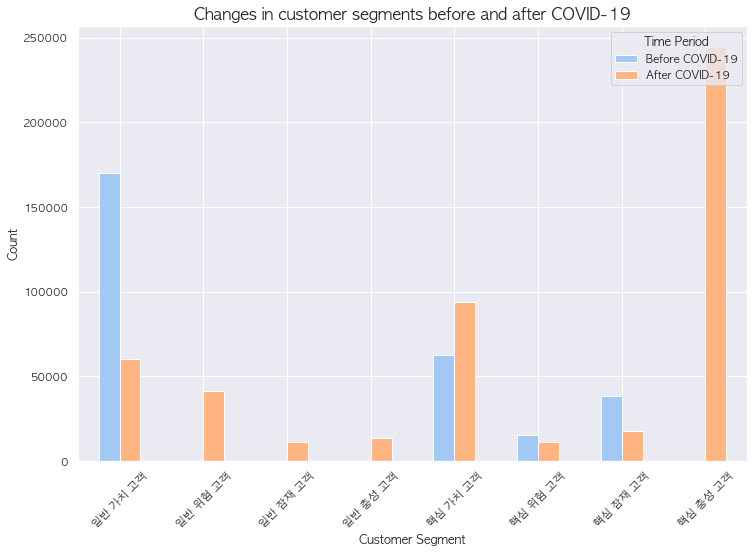

In [23]:
## COVID19 전후 고객 세그먼트 변화 시각화

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# '2020-01-31' 이전의 segment
before_covid = rfm_score_merged[rfm_score_merged['t_dat'] < '2020-01-31']['segment'].value_counts()

# '2020-01-31' 이후의 segment
after_covid = rfm_score_merged[rfm_score_merged['t_dat'] >= '2020-01-31']['segment'].value_counts()

# 두 시리즈를 인덱스 기준으로 합치기
segment_changes = pd.DataFrame({
    'Before COVID-19': before_covid,
    'After COVID-19': after_covid
}).fillna(0)  # NaN 값을 0으로 채워줍니다.

# 시각화
plt.figure(figsize=(12, 8))
sns.set_palette(sns.color_palette("pastel"))

# segment 변화 시각화
segment_changes.plot(kind='bar', figsize=(12, 8))
plt.title('Changes in customer segments before and after COVID-19', fontsize=16)
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Time Period', loc='upper right')
plt.show()

### => 타겟 고객층 : 핵심 가치 고객, 핵심 충성 고객

In [24]:
# 필요한 컬럼만 선택하여 병합
final_df = pd.merge(rfm_score_merged, df2030[['customer_id', 'sales_channel_id', 'fashion_news_frequency']], 
                    on='customer_id', how='inner')

final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19563640 entries, 0 to 19563639
Data columns (total 18 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   customer_id             object        
 1   t_dat                   datetime64[ns]
 2   diff_date               int64         
 3   r_score                 int64         
 4   frequency               int64         
 5   f_score                 int64         
 6   price                   float64       
 7   m_score                 int64         
 8   rfm_class               object        
 9   rfm_total_score         int64         
 10  r_class                 int64         
 11  f_class                 int64         
 12  m_class                 int64         
 13  segment                 object        
 14  count                   int64         
 15  percent                 float64       
 16  sales_channel_id        int64         
 17  fashion_news_frequency  object        
dtype

## 1. COVID-19 전후 구매 유입 채널 변화

<Figure size 864x576 with 0 Axes>

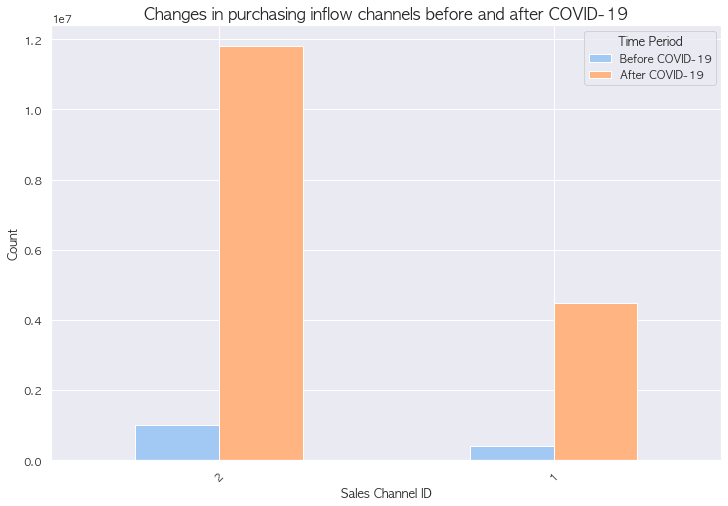

In [25]:
## 코로나19 전후 '핵심 가치 고객'과 '핵심 충성 고객'에 한해서 구매 유입 채널 변화 시각화

# '핵심 가치 고객'과 '핵심 충성 고객' 필터링
core_customers = final_df[final_df['segment'].isin(['핵심 가치 고객', '핵심 충성 고객'])]

# t_dat이 2020-01-31 전후로 sales_channel_id의 변화 파악
before_covid_sales_channel = core_customers[core_customers['t_dat'] < '2020-01-31']['sales_channel_id'].value_counts()
after_covid_sales_channel = core_customers[core_customers['t_dat'] >= '2020-01-31']['sales_channel_id'].value_counts()

# 데이터프레임으로 변환 및 NaN 값 0으로 채우기
sales_channel_changes = pd.DataFrame({
    'Before COVID-19': before_covid_sales_channel,
    'After COVID-19': after_covid_sales_channel
}).fillna(0)

# 시각화
plt.figure(figsize=(12, 8))
sns.set_palette(sns.color_palette("pastel"))

# 구매 채널 변화 시각화
sales_channel_changes.plot(kind='bar', figsize=(12, 8))
plt.title('Changes in purchasing inflow channels before and after COVID-19', fontsize=16)
plt.xlabel('Sales Channel ID', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Time Period', loc='upper right')
plt.show()

## 2. COVID-19 전후 H&M 패션 뉴스 구독 알림 주기 변화

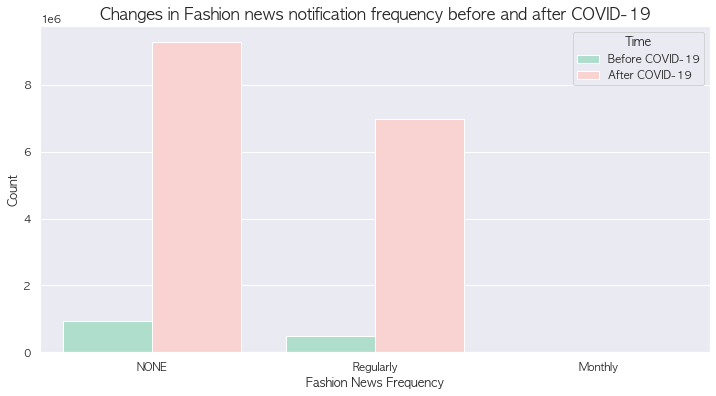

In [26]:
# '핵심 가치 고객', '핵심 충성 고객'에 해당하는 데이터 필터링
core_customers = ['핵심 가치 고객', '핵심 충성 고객']
before_covid_core = final_df[(final_df['segment'].isin(core_customers)) & (final_df['t_dat'] < '2020-01-31')]
after_covid_core = final_df[(final_df['segment'].isin(core_customers)) & (final_df['t_dat'] >= '2020-01-31')]

# before와 after 데이터 합치기
combined_data = pd.concat([before_covid_core.assign(Time='Before COVID-19'), 
                           after_covid_core.assign(Time='After COVID-19')], axis=0)

# 시각화
plt.figure(figsize=(12, 6))
sns.countplot(data=combined_data, x='fashion_news_frequency', hue='Time', palette=['#A8E6CF', '#FFCCCC'])
plt.title('Changes in Fashion news notification frequency before and after COVID-19', fontsize=16)
plt.xlabel('Fashion News Frequency', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Time', loc='upper right', labels=['Before COVID-19', 'After COVID-19'])
plt.show()